In [109]:
import numpy as np
import cv2
import imutils
import matplotlib.pyplot as plt

In [110]:
def imshow(image):
    plt.figure(figsize=(15, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [111]:
def load_images(path):
    X = []
    y = []
    curr_y = 0

    # read all entities in data folder
    for entity in os.listdir(path):
        images_path = os.path.join(path, entity)

        # read all the images of each entity
        for filename in os.listdir(images_path):
            image_path = os.path.join(images_path, filename)
            image = cv2.imread(image_path, 0)
            X.append(image)
            y.append(curr_y)
                 
        curr_y += 1
    
    y = np.vstack(y)
    X = np.stack(X)

    return X, y.ravel()

In [112]:
data_path = 'data/'
X, y = load_images(data_path)
print(X.shape)
print(y.shape)

(520, 105, 105)
(520,)


In [113]:
def make_pairs(images, labels):
	# initialize two empty lists to hold the (image, image) pairs and
	# labels to indicate if a pair is positive or negative
	pair_images = []
	pair_labels = []
	
	numClasses = len(np.unique(labels))
	# create list of arrays with same label
	pos_label_list = [np.where(labels == i)[0] for i in range(0, numClasses)]

	# loop over all images
	for image in range(len(images)):
		currentImage = images[image]
		label = labels[image]

		"""
		positive pair
		"""
		# take random image of same label
		image_pos = images[np.random.choice(pos_label_list[label])]

		# append positive pair and update label to 1
		pair_images.append([currentImage, image_pos])
		pair_labels.append([1])

		"""
		negative pair
		"""
		neg_label_list = np.where(labels != label)[0]
		image_neg = images[np.random.choice(neg_label_list)]

		# append negative pair and update label to 0
		pair_images.append([currentImage, image_neg])
		pair_labels.append([0])

	return (np.array(pair_images), np.array(pair_labels))

In [114]:
(X_train, y_train) = make_pairs(X, y)

In [115]:
def visualize_pairs(pairTrain, labelTrain):
    images = []

    for i in np.random.choice(np.arange(0, len(pairTrain)), size=(49,)):
        # grab the current image pair and label
        imageA = pairTrain[i][0]
        imageB = pairTrain[i][1]
        label = labelTrain[i]

        output = np.zeros((121, 214), dtype="uint8")
        pair = np.hstack([imageA, imageB])
        output[4:109, 0:210] = pair

        text = "-" if label[0] == 0 else "+"
        color = (0, 0, 255) if label[0] == 0 else (0, 255, 0)

        # create a 3-channel RGB image from the grayscale pair,
        vis = cv2.merge([output] * 3)
        cv2.putText(vis, text, (4, 30), cv2.FONT_HERSHEY_SIMPLEX, 1.2,
            color, 3)
        images.append(vis)
    
    return images

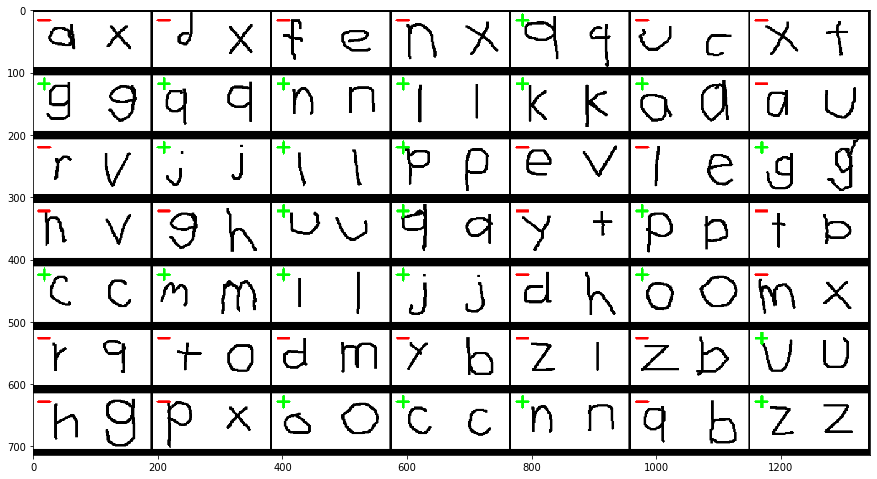

In [116]:
# construct the montage for the images
montage = imutils.build_montages(visualize_pairs(X_train, y_train), (192, 102), (7, 7))[0]
imshow(montage)